# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"




In [6]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    

# Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["timezone"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | pipirig
Processing Record 3 of Set 1 | sake
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | general angel flores (la palma)
City not found. Skipping...
Processing Record 6 of Set 1 | tadine
Processing Record 7 of Set 1 | enewetak
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | miquelon
Processing Record 12 of Set 1 | mohr
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | okha
Processing Record 18 of Set 1 | saint-louis
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | crane
Processing Record

In [7]:
city_weather

{'coord': {'lon': 114.9167, 'lat': 51.2833},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 279.95,
  'feels_like': 278.21,
  'temp_min': 279.95,
  'temp_max': 279.95,
  'pressure': 1012,
  'humidity': 25,
  'sea_level': 1012,
  'grnd_level': 927},
 'visibility': 10000,
 'wind': {'speed': 2.46, 'deg': 304, 'gust': 2.76},
 'clouds': {'all': 5},
 'dt': 1712665765,
 'sys': {'country': 'RU', 'sunrise': 1712612269, 'sunset': 1712660734},
 'timezone': 32400,
 'id': 2019892,
 'name': 'Mogoytuy',
 'cod': 200}

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,299.87,85,99,10.54,MH,43200
1,pipirig,47.2500,26.0667,294.34,26,62,3.68,RO,10800
2,sake,-1.5736,29.0450,296.77,81,43,0.44,CD,7200
3,hasaki,35.7333,140.8333,285.53,71,100,9.71,JP,32400
4,tadine,-21.5500,167.8833,298.25,84,100,5.60,NC,39600


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,299.87,85,99,10.54,MH,43200
1,pipirig,47.2500,26.0667,294.34,26,62,3.68,RO,10800
2,sake,-1.5736,29.0450,296.77,81,43,0.44,CD,7200
3,hasaki,35.7333,140.8333,285.53,71,100,9.71,JP,32400
4,tadine,-21.5500,167.8833,298.25,84,100,5.60,NC,39600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

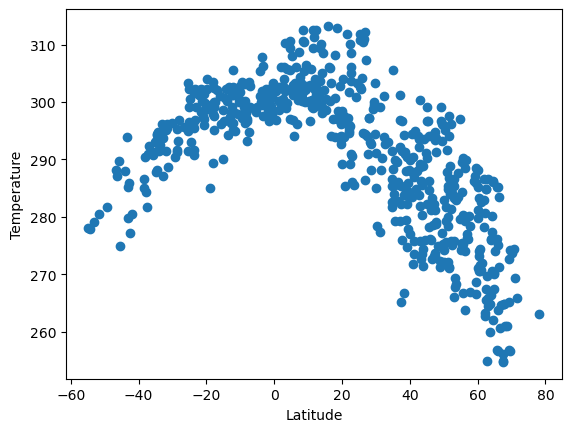

<Figure size 640x480 with 0 Axes>

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

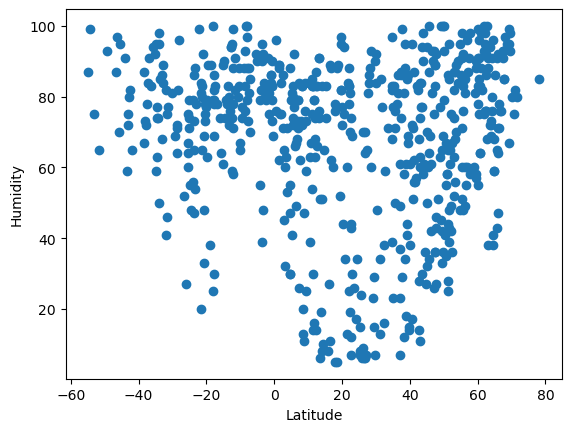

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

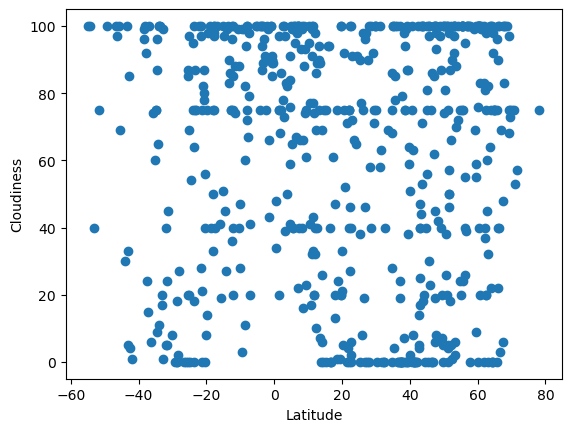

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

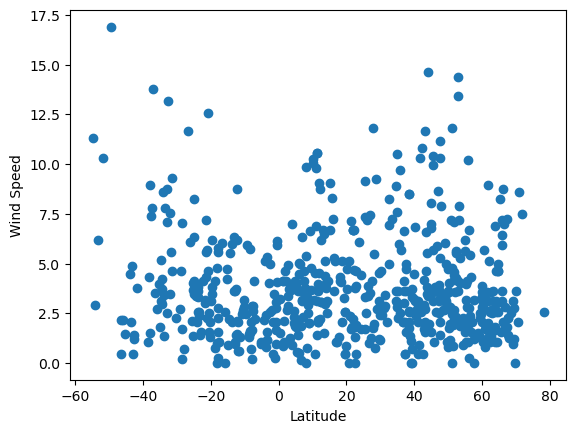

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)



City_ID
0      3.789497
1      3.688083
2      3.825537
3      3.720506
4      3.881777
         ...   
595    3.764679
596    3.631073
597    3.736767
598    3.676874
599    3.676728
Name: Lat, Length: 600, dtype: float64
y = -0.0x +3.82


The r-value is: 0.0011307260584642624


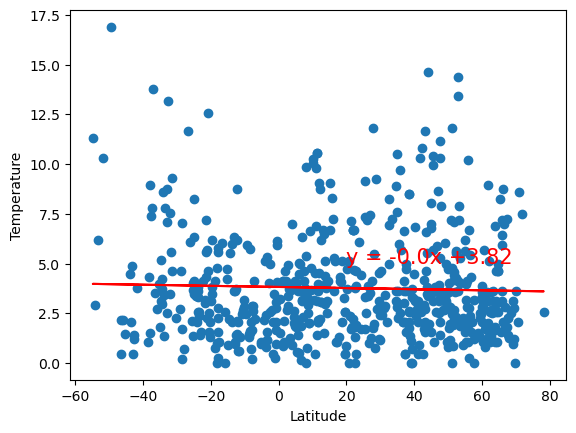

In [17]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_lat=[]
for x in city_data_df["Lat"]:
    if x >= 0:
      northern_hemi_lat.append(x)
northern_hemi_lat_df = pd.DataFrame(northern_hemi_lat)
northern_hemi_lat_df = northern_hemi_lat_df.rename(columns={0: 'Lat'})
northern_hemi_lat_df.head()


,Lat
0,11.2278
1,47.2500
2,35.7333
3,11.3474
4,69.4865


In [128]:
# Display sample data
northern_hemi_df = pd.merge(city_data_df, northern_hemi_lat_df, on = "Lat")
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,299.87,85,99,10.54,MH,43200
1,pipirig,47.2500,26.0667,294.34,26,62,3.68,RO,10800
2,hasaki,35.7333,140.8333,285.53,71,100,9.71,JP,32400
3,enewetak,11.3474,162.3373,300.37,83,100,10.57,MH,43200
4,talnakh,69.4865,88.3972,256.60,98,73,1.19,RU,25200
...,...,...,...,...,...,...,...,...,...
421,niquero,20.0431,-77.5828,298.39,72,21,3.70,CU,-14400
422,vorkuta,67.5000,64.0000,254.88,93,6,1.79,RU,10800
423,shenjiamen,29.9576,122.2980,285.08,84,100,2.43,CN,28800
424,tidworth,51.2314,-1.6632,284.76,65,75,11.83,GB,3600


In [132]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_lat=[]
for x in city_data_df["Lat"]:
    if x < 0:
      southern_hemi_lat.append(x)
southern_hemi_lat_df = pd.DataFrame(southern_hemi_lat)
southern_hemi_lat_df = southern_hemi_lat_df.rename(columns={0: 'Lat'})
southern_hemi_lat_df.head()


,Lat
0,-1.5736
1,-21.5500
2,-54.2811
3,-49.3500
4,-25.0660


In [130]:
# Display sample data
southern_hemi_df = pd.merge(city_data_df, southern_hemi_lat_df, on = "Lat")
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sake,-1.5736,29.0450,296.77,81,43,0.44,CD,7200
1,tadine,-21.5500,167.8833,298.25,84,100,5.60,NC,39600
2,grytviken,-54.2811,-36.5092,277.92,99,100,2.90,GS,-7200
3,port-aux-francais,-49.3500,70.2167,281.65,93,100,16.90,TF,18000
4,adamstown,-25.0660,-130.1015,296.53,79,69,3.48,PN,-28800
...,...,...,...,...,...,...,...,...,...
173,eldorado,-23.7869,-54.2836,301.52,65,0,3.32,BR,-14400
174,vallenar,-28.5708,-70.7581,291.32,71,0,1.70,CL,-14400
175,lauro de freitas,-12.8944,-38.3272,298.16,94,75,3.60,BR,-10800
176,jandaia do sul,-23.6031,-51.6433,295.51,86,100,2.35,BR,-10800


###  Temperature vs. Latitude Linear Regression Plot

ValueError: x and y must be the same size

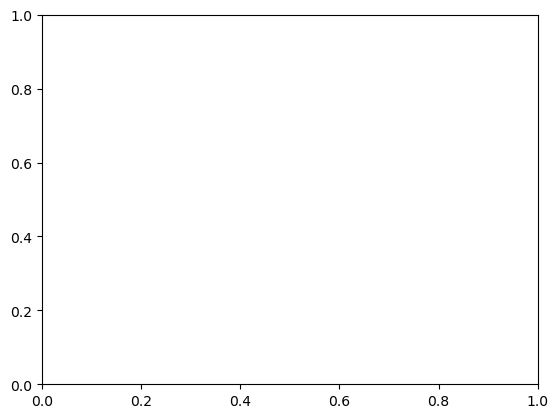

In [70]:
# Build scatter plot for latitude vs. temperature
x_values = northern_hemi_df
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [69]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 600

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE